In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)

In [2]:
# Load customer churn data
df = pd.read_csv("../data/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Drop customer ID column (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)


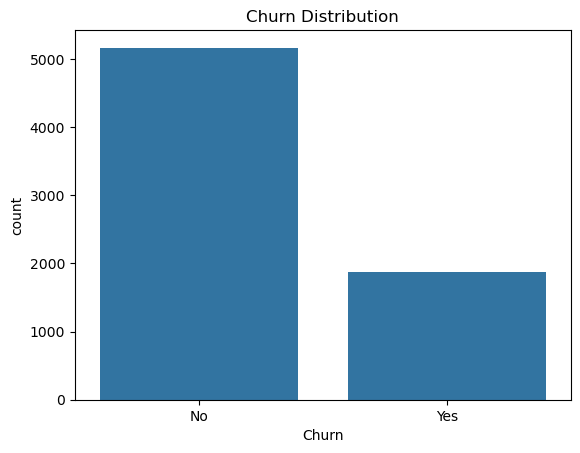

In [4]:
# Visualize churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [5]:
# Encode categorical variables (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and label
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']


In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)

# Evaluate
print("🔍 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("ROC AUC:", roc_auc_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))


🔍 Logistic Regression Results:
Accuracy: 0.7874911158493249
ROC AUC: 0.7000533206330143
Confusion Matrix:
 [[916 117]
 [182 192]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



c:\Users\athar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("🌲 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


🌲 Random Forest Results:
Accuracy: 0.7853589196872779
ROC AUC: 0.6866610412536043
Confusion Matrix:
 [[927 106]
 [196 178]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [9]:
import pickle

# Save models
with open("../backend/models/logistic_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

with open("../backend/models/random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save columns used for input
with open("../backend/models/columns_used.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)


In [11]:
import joblib
import os

# Create folder if it doesn't exist
output_dir = "../backend/models"
os.makedirs(output_dir, exist_ok=True)

# Save models
joblib.dump(lr_model, os.path.join(output_dir, "logistic_model.pkl"))
joblib.dump(rf_model, os.path.join(output_dir, "random_forest_model.pkl"))

# Save feature columns
joblib.dump(list(X.columns), os.path.join(output_dir, "columns_used.pkl"))


['../backend/models\\columns_used.pkl']